# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import json
import requests
from api_keys import w_api_key
from citipy import citipy
import numpy as np
import pandas as pd
from scipy.stats import linregress
from matplotlib import pyplot as plt

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# check city count to confirm 500
print(len(cities))

610


In [3]:
#create weather_df to store city and realted weather attributes
weather_df = pd.DataFrame({'Cities': cities})
weather_df['Country'] = np.NaN
weather_df['Date'] = np.NaN
weather_df['Latitude'] = np.NaN
weather_df['Longitude'] = np.NaN
weather_df['Temperature (F)'] = np.NaN
weather_df['Humidity (%)'] = np.NaN
weather_df['Cloudiness (%)'] = np.NaN
weather_df['Wind Speed (mph)'] = np.NaN
weather_df.head()

,Cities,Country,Date,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,attawapiskat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,kushnarenkovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tuatapere,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,komsomolskiy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,illoqqortoormiut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# api url
url = "http://api.openweathermap.org/data/2.5/weather/?"
units = "imperial"

#set a count for cities
count = 1

# loop through each city to retreive weather data from the api
for city in cities:
    
    # Exception Handling
    try:
        # retreive data for the cities
        query_url = f"{url}appid={w_api_key}&units={units}&q={city}"
        response = requests.get(query_url).json()
        
        print(f"Processing Record {count}, city: {city}")
               
        # write weather data to weather_df                
        weather_df.loc[count-1,'Country'] = response['sys']['country']
        weather_df.loc[count-1,'Date'] = response['dt']
        weather_df.loc[count-1,'Latitude'] = response['coord']['lat']
        weather_df.loc[count-1,'Longitude'] = response['coord']['lon']
        weather_df.loc[count-1,'Temperature (F)'] = response['main']['temp_max']
        weather_df.loc[count-1,'Humidity (%)'] = response['main']['humidity']
        weather_df.loc[count-1,'Cloudiness (%)'] = response['clouds']['all']
        weather_df.loc[count-1,'Wind Speed (mph)'] = response['wind']['speed']
                
        # Increase Processing Record Counter by 1 for successful processing
        count += 1
    except:
        print(f"Unable to process Record {count}, city: {city} not found. Skipping...")
        
        # Increase Processing Record Counter by 1 when processing is unsucessful
        count += 1
    continue
print(f"-----End of processing-------")

Processing Record 1, city: attawapiskat
Unable to process Record 1, city: attawapiskat not found. Skipping...
Processing Record 2, city: kushnarenkovo
Processing Record 3, city: tuatapere
Processing Record 4, city: komsomolskiy
Processing Record 5, city: illoqqortoormiut
Unable to process Record 5, city: illoqqortoormiut not found. Skipping...
Processing Record 6, city: hermanus
Processing Record 7, city: marcona
Unable to process Record 7, city: marcona not found. Skipping...
Processing Record 8, city: rikitea
Processing Record 9, city: mataura
Processing Record 10, city: mar del plata
Processing Record 11, city: bluff
Processing Record 12, city: fortuna
Processing Record 13, city: hamilton
Processing Record 14, city: tasiilaq
Processing Record 15, city: albany
Processing Record 16, city: ribeira grande
Processing Record 17, city: kapaa
Processing Record 18, city: san cristobal
Processing Record 19, city: waingapu
Processing Record 20, city: usinsk
Processing Record 21, city: kaitanga

Processing Record 190, city: sault sainte marie
Processing Record 191, city: lasa
Processing Record 192, city: tabiauea
Unable to process Record 192, city: tabiauea not found. Skipping...
Processing Record 193, city: bilibino
Processing Record 194, city: artigas
Processing Record 195, city: chandler
Processing Record 196, city: narasannapeta
Processing Record 197, city: muroto
Processing Record 198, city: fort-shevchenko
Processing Record 199, city: vardo
Processing Record 200, city: saint-pierre
Processing Record 201, city: kununurra
Processing Record 202, city: saint-philippe
Processing Record 203, city: barawe
Unable to process Record 203, city: barawe not found. Skipping...
Processing Record 204, city: saint-augustin
Processing Record 205, city: thompson
Processing Record 206, city: filomeno mata
Processing Record 207, city: bargal
Unable to process Record 207, city: bargal not found. Skipping...
Processing Record 208, city: coquimbo
Processing Record 209, city: taburi
Unable to pr

Processing Record 375, city: palabuhanratu
Unable to process Record 375, city: palabuhanratu not found. Skipping...
Processing Record 376, city: alofi
Processing Record 377, city: san joaquin
Processing Record 378, city: calvinia
Processing Record 379, city: takoradi
Processing Record 380, city: provideniya
Processing Record 381, city: flagstaff
Processing Record 382, city: beringovskiy
Processing Record 383, city: tabuk
Processing Record 384, city: sinkat
Unable to process Record 384, city: sinkat not found. Skipping...
Processing Record 385, city: asha
Processing Record 386, city: gushikawa
Processing Record 387, city: mayumba
Processing Record 388, city: leh
Processing Record 389, city: erzin
Processing Record 390, city: fredericksburg
Processing Record 391, city: shemgang
Processing Record 392, city: arrecife
Processing Record 393, city: nevsehir
Processing Record 394, city: bathsheba
Processing Record 395, city: kollo
Processing Record 396, city: bud
Processing Record 397, city: b

Processing Record 560, city: khani
Processing Record 561, city: portsmouth
Processing Record 562, city: tura
Processing Record 563, city: egersund
Processing Record 564, city: gannan
Processing Record 565, city: amudat
Processing Record 566, city: viedma
Processing Record 567, city: atbasar
Processing Record 568, city: longlac
Unable to process Record 568, city: longlac not found. Skipping...
Processing Record 569, city: miranorte
Unable to process Record 569, city: miranorte not found. Skipping...
Processing Record 570, city: tevaitoa
Processing Record 571, city: pitea
Processing Record 572, city: simav
Processing Record 573, city: pala
Processing Record 574, city: wilmington
Processing Record 575, city: biltine
Processing Record 576, city: churapcha
Processing Record 577, city: ranau
Processing Record 578, city: haibowan
Unable to process Record 578, city: haibowan not found. Skipping...
Processing Record 579, city: ushtobe
Processing Record 580, city: orlik
Processing Record 581, ci

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# drop the records with NaN values
weather_df.dropna(inplace=True)

# write weather_df to the csv file
weather_df.to_csv('output_data/cities.csv')
weather_df

,Cities,Country,Date,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
1,kushnarenkovo,RU,1.601716e+09,55.10,55.35,62.60,55.0,1.0,11.18
2,tuatapere,NZ,1.601716e+09,-46.13,167.68,55.00,92.0,100.0,10.00
3,komsomolskiy,UZ,1.601716e+09,40.43,71.72,71.60,18.0,0.0,9.17
5,hermanus,ZA,1.601716e+09,-34.42,19.23,59.00,92.0,99.0,4.00
7,rikitea,PF,1.601716e+09,-23.12,-134.97,72.72,79.0,36.0,15.59
...,...,...,...,...,...,...,...,...,...
605,guanay,BO,1.601716e+09,-15.50,-67.88,73.62,70.0,100.0,1.16
606,koslan,RU,1.601716e+09,63.46,48.90,44.40,59.0,88.0,5.39
607,port shepstone,ZA,1.601716e+09,-30.74,30.45,64.04,87.0,100.0,19.04
608,foz,ES,1.601716e+09,43.57,-7.25,55.00,1.0,37.0,11.14


In [6]:
# get statistical summary for weather_df
weather_df.describe()

,Date,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
count,5.580000e+02,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000
mean,1.601716e+09,20.632599,17.486774,64.256523,70.817204,51.935484,8.674606
std,1.106507e+02,33.060547,89.883933,18.021947,21.631289,38.742711,5.841673
min,1.601716e+09,-54.800000,-175.200000,22.460000,1.000000,0.000000,0.180000
25%,1.601716e+09,-6.807500,-61.187500,50.017500,62.000000,7.000000,3.655000
50%,1.601716e+09,24.785000,19.910000,66.090000,76.000000,54.500000,7.200000
75%,1.601716e+09,49.277500,98.115000,78.902500,86.000000,90.000000,12.080000
max,1.601716e+09,78.220000,179.320000,105.760000,100.000000,100.000000,31.090000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

No Cities with humidity > 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

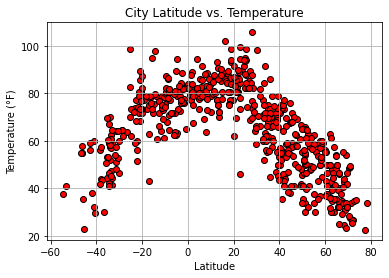

In [7]:
# Build Scatter Plot 
plt.scatter(weather_df['Latitude'], weather_df['Temperature (F)'], facecolors='red', marker='o', edgecolor='black')

# Define Graph Attributes
plt.title('City Latitude vs. Temperature')
plt.ylabel('Temperature (°F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save Figure
plt.savefig('output_data/City_Latitude_vs_Temperature.png')

# Show Plot
plt.show()

OBSERVATION: Temperatures generally increase as the cities get closer to the equator.

## Latitude vs. Humidity Plot

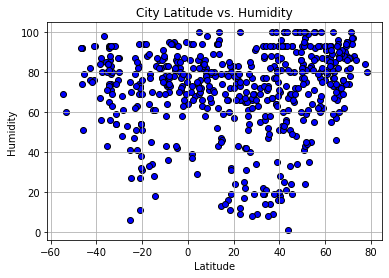

In [8]:
# Build Scatter Plot 
plt.scatter(weather_df['Latitude'], weather_df['Humidity (%)'], facecolors='blue', marker='o', edgecolor='black')

# Define Graph Attributes
plt.title('City Latitude vs. Humidity')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid(True)

# Save Figure
plt.savefig('output_data/City_Latitude_vs_Humidity.png')

# Show Plot
plt.show()

OBSERVATION: The charts do not demonstrate correlation between latitude and humidity

## Latitude vs. Cloudiness Plot

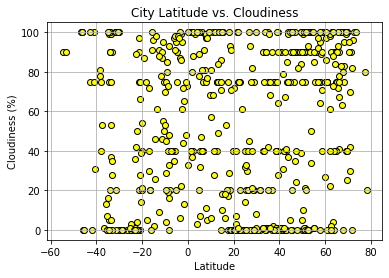

In [9]:
# Build Scatter Plot 
plt.scatter(weather_df['Latitude'], weather_df['Cloudiness (%)'], facecolors='yellow', marker='o', edgecolor='black')

# Define Graph Attributes
plt.title('City Latitude vs. Cloudiness')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save Figure
plt.savefig('output_data/City_Latitude_vs_Cloudiness.png')

# Show Plot
plt.show()

OBSERVATION: The charts do not demonstrate correlation between latitude and cloudiness

## Latitude vs. Wind Speed Plot

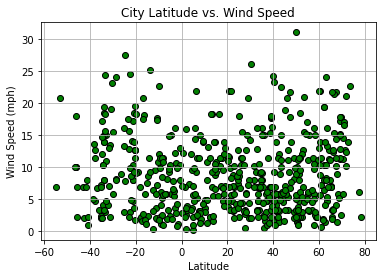

In [10]:
# Build Scatter Plot 
plt.scatter(weather_df['Latitude'], weather_df['Wind Speed (mph)'], facecolors='green', marker='o', edgecolor='black')

# Define Graph Attributes
plt.title('City Latitude vs. Wind Speed')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save Figure
plt.savefig('output_data/City_Latitude_vs_Wind Speed.png')

# Show Plot
plt.show()

## Linear Regression

OBSERVATION: The wind speeds are higher further from the equator.

## Linear Regression

In [11]:
#get data for northern and southern hemisphere
north_df = weather_df.loc[weather_df['Latitude'] > 0]
south_df = weather_df.loc[weather_df['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: -0.833119507852262


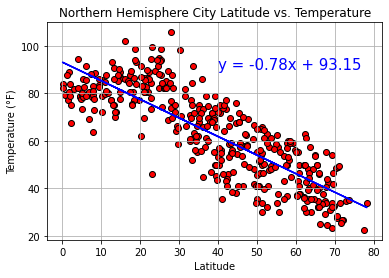

In [26]:
#define x and y values
x_values = north_df['Latitude']
y_values = north_df['Temperature (F)']

# calculate the linear regression equation and line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.scatter(x_values, y_values, facecolors='red', marker='o', edgecolor='black')
plt.plot(x_values,regress_values,"b-")


# Define Graph Attributes
plt.annotate(line_eq,(40,90),fontsize=15,color='blue')
plt.title('Northern Hemisphere City Latitude vs. Temperature')
plt.ylabel('Temperature (°F)')
plt.xlabel('Latitude')
plt.grid(True)

#print r value
print(f"The r value is: {rvalue}")

# Show Plot
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.733532473981367


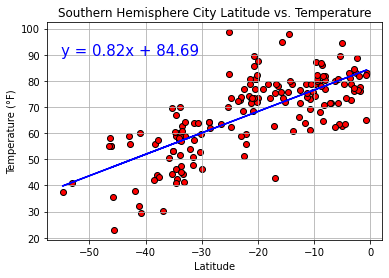

In [25]:
#define x and y values
x_values = south_df['Latitude']
y_values = south_df['Temperature (F)']

# calculate the linear regression equation and line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.scatter(x_values, y_values, facecolors='red', marker='o', edgecolor='black')
plt.plot(x_values,regress_values,"b-")


# Define Graph Attributes
plt.annotate(line_eq,(-55,90),fontsize=15,color='blue')
plt.title('Southern Hemisphere City Latitude vs. Temperature')
plt.ylabel('Temperature (°F)')
plt.xlabel('Latitude')
plt.grid(True)

#print r value
print(f"The r value is: {rvalue}")

# Show Plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.21702405424908394


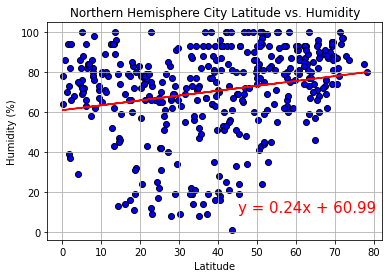

In [14]:
#define x and y values
x_values = north_df['Latitude']
y_values = north_df['Humidity (%)']

# calculate the linear regression equation and line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.scatter(x_values, y_values, facecolors='blue', marker='o', edgecolor='black')
plt.plot(x_values,regress_values,"r-")


# Define Graph Attributes
plt.annotate(line_eq,(45,10),fontsize=15,color='red')
plt.title('Northern Hemisphere City Latitude vs. Humidity')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

#print r value
print(f"The r value is: {rvalue}")

# Show Plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: -0.0402580374669514


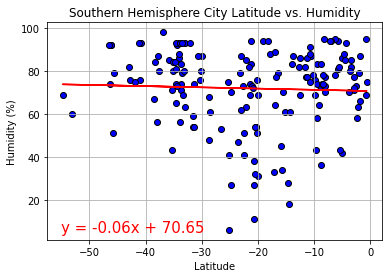

In [15]:
#define x and y values
x_values = south_df['Latitude']
y_values = south_df['Humidity (%)']

# calculate the linear regression equation and line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.scatter(x_values, y_values, facecolors='blue', marker='o', edgecolor='black')
plt.plot(x_values,regress_values,"r-")


# Define Graph Attributes
plt.annotate(line_eq,(-55,5),fontsize=15,color='red')
plt.title('Southern Hemisphere City Latitude vs. Humidity')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

#print r value
print(f"The r value is: {rvalue}")

# Show Plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.13889828723908296


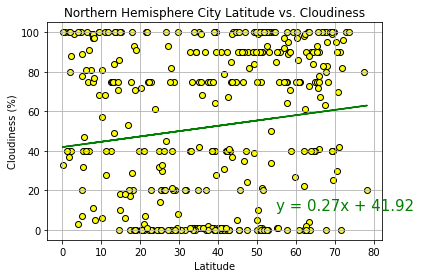

In [20]:
#define x and y values
x_values = north_df['Latitude']
y_values = north_df['Cloudiness (%)']

# calculate the linear regression equation and line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.scatter(x_values, y_values, facecolors='yellow', marker='o', edgecolor='black')
plt.plot(x_values,regress_values,"g-")


# Define Graph Attributes
plt.annotate(line_eq,(55, 10),fontsize=15,color='green')
plt.title('Northern Hemisphere City Latitude vs. Cloudiness')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

#print r value
print(f"The r value is: {rvalue}")

# Show Plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.04905880221316714


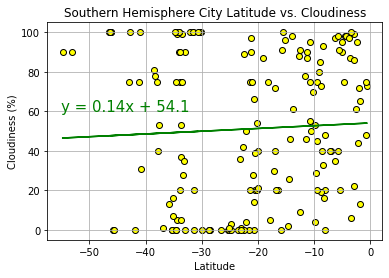

In [22]:
#define x and y values
x_values = south_df['Latitude']
y_values = south_df['Cloudiness (%)']

# calculate the linear regression equation and line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.scatter(x_values, y_values, facecolors='yellow', marker='o', edgecolor='black')
plt.plot(x_values,regress_values,"g-")


# Define Graph Attributes
plt.annotate(line_eq,(-55,60),fontsize=15,color='green')
plt.title('Southern Hemisphere City Latitude vs. Cloudiness')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

#print r value
print(f"The r value is: {rvalue}")

# Show Plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: 0.16496806025417535


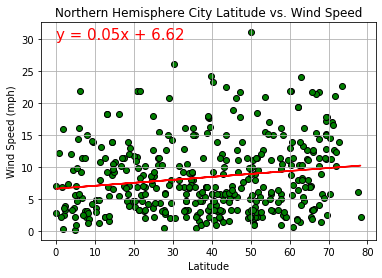

In [23]:
#define x and y values
x_values = north_df['Latitude']
y_values = north_df['Wind Speed (mph)']

# calculate the linear regression equation and line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.scatter(x_values, y_values, facecolors='green', marker='o', edgecolor='black')
plt.plot(x_values,regress_values,"r-")


# Define Graph Attributes
plt.annotate(line_eq,(0,30),fontsize=15,color='red')
plt.title('Northern Hemisphere City Latitude vs. Wind Speed')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

#print r value
print(f"The r value is: {rvalue}")

# Show Plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: -0.15139754902900437


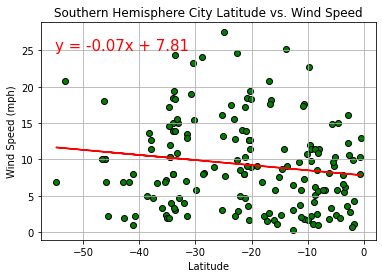

In [24]:
#define x and y values
x_values = south_df['Latitude']
y_values = south_df['Wind Speed (mph)']

# calculate the linear regression equation and line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.scatter(x_values, y_values, facecolors='green', marker='o', edgecolor='black')
plt.plot(x_values,regress_values,"r-")


# Define Graph Attributes
plt.annotate(line_eq,(-55,25),fontsize=15,color='red')
plt.title('Southern Hemisphere City Latitude vs. Wind Speed')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

#print r value
print(f"The r value is: {rvalue}")

# Show Plot
plt.show()